Go to directory: /Users/yunjunz/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR
reading height data from file: ./INPUTS/geometryRadar.h5 ...
reading azimuthCoord data from file: ./INPUTS/geometryGeo.h5 ...
reading rangeCoord data from file: ./INPUTS/geometryGeo.h5 ...


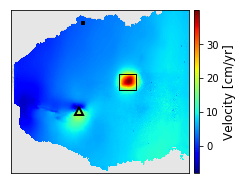

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pysar.objects import sensor
from pysar.utils import readfile, plot as pp, utils as ut
from pysar.simulation.plot import *

work_dir = '~/insarlab/PYSAR_EXAMPLE/AlcedoSenDT128/PYSAR'
work_dir = '~/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR'
work_dir = os.path.expanduser(work_dir)
os.chdir(work_dir)
print('Go to directory: '+work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]
out_file = '{}_avgPhaseVel.jpg'.format(proj_name)

# Option 1 - plot with view.py from PySAR
plotCmd = 'view.py avgPhaseVelocity.h5 -m maskSpatialCoh.h5 '
plotCmd += ' -d ./INPUTS/geometryRadar.h5 --dem-nocontour --ref-size 3 '
plotCmd += ' --fontsize 12 --figsize 4 3 --notitle --dpi 600 --nodisplay --cbar-label "Velocity [cm/yr]" '
plotCmd += ' -o {} --notick'.format(out_file)
#print(plotCmd)
#os.system(plotCmd)

# Option 2 - plot with matplotlib
data, atr = readfile.read('avgPhaseVelocity.h5')
ref_y, ref_x = int(atr['REF_Y']), int(atr['REF_X'])
mask = readfile.read('maskSpatialCoh.h5')[0]
data[mask==0] = np.nan
data *= 100.
dem = readfile.read('./INPUTS/geometryRadar.h5', datasetName='height')[0]

inps = pp.cmd_line_parse()
inps.disp_dem_contour = False

fig, ax = plt.subplots(figsize=[4, 3])
ax = pp.plot_dem_background(ax=ax, geo_box=None, dem=dem, inps=inps, print_msg=False)
im = ax.imshow(data, cmap='jet')
pp.auto_flip_direction(atr, ax=ax, print_msg=False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ax.plot(ref_x, ref_y, 'ks', ms=3)

## Mark AOI for network modification
fl = open('ifgramStack_coherence_spatialAvg.txt', 'r')
lines = fl.readlines()
fl.close()
aoi_line = [i for i in lines if '# AOI box:' in i][0]
x0, y0, x1, y1 = [int(i.strip()) for i in aoi_line.split('# AOI box: (')[1].strip().split(")")[0].split(',')]
xx = [x0, x1, x1, x0, x0]
yy = [y0, y0, y1, y1, y0]
ax.plot(xx, yy, 'k-', linewidth=1)

## Mark Point for extended DEM error correction
lat, lon = -0.928, -91.270
coord = ut.coordinate(atr, lookup_file='./INPUTS/geometryGeo.h5')
y, x = coord.geo2radar(lat, lon)[0:2]
ax.plot(x, y, "k^", mfc='none', mew=2, ms=8)

# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", "3%", pad="3%")
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Velocity [cm/yr]', fontsize=font_size)

plt.savefig(out_file,  bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()